In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
deliveries = pd.read_csv('Ipl Data/deliveries.csv')
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193399,1237181,2,Mumbai Indians,Delhi Capitals,18,6,HH Pandya,Ishan Kishan,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
193400,1237181,2,Mumbai Indians,Delhi Capitals,19,1,HH Pandya,Ishan Kishan,Anrich Nortje,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
193401,1237181,2,Mumbai Indians,Delhi Capitals,19,2,Ishan Kishan,HH Pandya,Anrich Nortje,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
193402,1237181,2,Mumbai Indians,Delhi Capitals,19,3,HH Pandya,Ishan Kishan,Anrich Nortje,0,...,0,0,0,0,0,0,0,HH Pandya,caught,AM Rahane


In [2]:
# Making List of batsman, his total_runs and number of balls he faced

over1620 = deliveries[deliveries['over']>=16]
batsman_list = []
total_runs_list = []
bowls_list = []
for match in over1620['match_id'].unique():
    new_data = over1620[over1620['match_id'] == match]
    runs_data = new_data.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name = "runs")
    batsman_list.append(runs_data['batsman'])
    total_runs_list.append(runs_data['runs'])
    bowls_data = new_data.groupby('batsman').count().reset_index()
    bowls_list.append(bowls_data['ball'])

In [3]:
# BatsMan Name
name = []
for i in batsman_list:
    for j in i:
        name.append(j)

In [4]:
# Runs by Him
runs = []
for i in total_runs_list:
    for j in i:
        runs.append(j)

In [5]:
# Bowls Faced by Him
balls = []
for i in bowls_list:
    for j in i:
        balls.append(j)

In [6]:
strikeRate = []
for i in range(len(runs)):
    res = runs[i]/balls[i]
    strikeRate.append(res*100)

C:\Users\kavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Strike_Rate', ylabel='Batsman'>

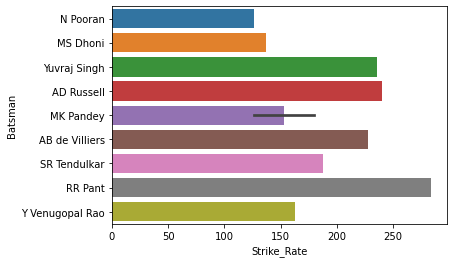

In [7]:
df = pd.DataFrame(list(zip(name,strikeRate,balls,runs)),columns=['Batsman','Strike_Rate','Balls','Runs'])
final = df.sort_values(by='Balls',ascending=False)
final = final[:10]
sns.barplot(final['Strike_Rate'],final['Batsman'])


# Plot of PLayer and it's Strike Rate who have played maximum number of balls of their best match

In [8]:
# Top 10 Avg SR

df1 = df.groupby('Batsman').apply(lambda x: np.average(x['Strike_Rate'])).reset_index(name="Avg_SR")
final1 = df1.sort_values(by='Avg_SR',ascending=False)
final1[:10]

# These player have played less amount of balls so their Avg_SR is high in overs 16-20

,Batsman,Avg_SR
129,DT Patil,400.000000
174,J Searles,320.000000
315,PA Reddy,300.000000
433,Salman Butt,266.666667
77,BJ Rohrer,252.840434
66,B Stanlake,250.000000
253,M Santner,237.500000
239,LPC Silva,230.000000
156,HM Amla,227.462121
237,LJ Wright,217.845118


C:\Users\kavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Strike_Rate', ylabel='Batsman'>

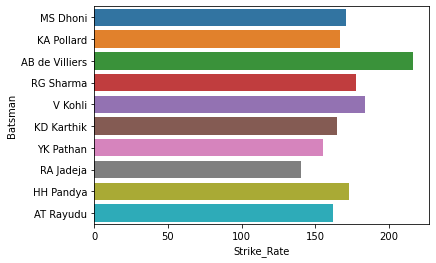

In [9]:
dfBall = df.groupby('Batsman').apply(lambda x: np.sum(x['Balls'])).reset_index(name="Balls")
dfBall_new = dfBall.sort_values(by='Batsman')
dfRuns = df.groupby('Batsman').apply(lambda x: np.sum(x['Runs'])).reset_index(name="Runs")
dfRuns_new = dfRuns.sort_values(by='Batsman')
dat = pd.DataFrame()
dat['Batsman'] = dfBall_new['Batsman']
dat['Balls'] = dfBall_new['Balls']
dat['Runs'] = dfRuns_new['Runs']
dat = dat.sort_values(by='Runs',ascending=False)
dat['Strike_Rate'] = (dat['Runs']/dat['Balls'])*100
dat = dat[:10]
sns.barplot(dat['Strike_Rate'],dat['Batsman'])

# PLot of Avergae Strike Rate (considering all Match) in overs 16-20 of players who have scored maximum Runs in 16-20 overs